In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.inspection import permutation_importance


### One-hot encoding

In [3]:
df = pd.DataFrame({'color': ['green', 'yellow', 'red', 'green']})
df

,color
0,green
1,yellow
2,red
3,green


In [4]:
pd.get_dummies(df.color, drop_first=False) # also try drop_first=True

,green,red,yellow
0,True,False,False
1,False,False,True
2,False,True,False
3,True,False,False


In [5]:
df.join(pd.get_dummies(df.color, drop_first=False))

,color,green,red,yellow
0,green,True,False,False
1,yellow,False,False,True
2,red,False,True,False
3,green,True,False,False


### Binning

In [10]:
df = pd.DataFrame({'age': [0, 4, 7, 14, 18, 46, 92]})
df

,age
0,0
1,4
2,7
3,14
4,18
5,46
6,92


In [12]:
pd.cut(df.age, bins=[0, 3, 18, 65, np.inf], right=False, labels=['baby', 'child', 'adult', 'senior'])

0      baby
1     child
2     child
3     child
4     adult
5     adult
6    senior
Name: age, dtype: category
Categories (4, object): ['baby' < 'child' < 'adult' < 'senior']

### Rescaling

#### Min-max normalization

In [14]:
X = np.array([[0, 100], [1, 101], [2, 102], [3, 103]])
X

array([[  0, 100],
       [  1, 101],
       [  2, 102],
       [  3, 103]])

In [16]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) # do scaling
X_scaled

array([[0.        , 0.        ],
       [0.33333333, 0.33333333],
       [0.66666667, 0.66666667],
       [1.        , 1.        ]])

In [18]:
scaler.inverse_transform(X_scaled) # undo scaling

array([[  0., 100.],
       [  1., 101.],
       [  2., 102.],
       [  3., 103.]])

#### Standardization

In [20]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) # do scaling
X_scaled

array([[-1.34164079, -1.34164079],
       [-0.4472136 , -0.4472136 ],
       [ 0.4472136 ,  0.4472136 ],
       [ 1.34164079,  1.34164079]])

In [22]:
# check that it is doing what we expect on first column:
x = X[:, 0]
mu = np.mean(x)
sigma = np.std(x, ddof=0) # caution: ddof=1 gives usual sample standard deviation
print(f'For x={x}, mu={mu:.3}, sigma={sigma:.3}, z={(x - mu) / sigma}')

For x=[0 1 2 3], mu=1.5, sigma=1.12, z=[-1.34164079 -0.4472136   0.4472136   1.34164079]


In [24]:
scaler.inverse_transform(X_scaled) # undo scaling

array([[  0., 100.],
       [  1., 101.],
       [  2., 102.],
       [  3., 103.]])

### Data imputation

In [45]:
df = pd.DataFrame({'color': ['green', None, 'red', 'green'],
                  'n': [0, 1, np.nan, 3]})
df

,color,n
0,green,0.0
1,None,1.0
2,red,NaN
3,green,3.0


#### Replace missing value with mean

In [48]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)
imp.fit_transform(df[['n']])

array([[0.        ],
       [1.        ],
       [1.33333333],
       [3.        ]])

#### Replace missing value with a value outside feature's normal range

In [51]:
imp = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=-1)
imp.fit_transform(df[['n']])

array([[ 0.],
       [ 1.],
       [-1.],
       [ 3.]])

#### Replace missing string value with most frequent string

In [54]:
imp = SimpleImputer(missing_values=None, strategy='most_frequent', fill_value=None)
imp.fit_transform(df[['color']])

array([['green'],
       ['green'],
       ['red'],
       ['green']], dtype=object)

### Feature selection

In [34]:
df = pd.read_csv('http://www.stat.wisc.edu/~jgillett/451/data/mtcars.csv', index_col=0)
features = ['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
X = df[features]
y = df['mpg']
selector = SelectKBest(score_func=f_regression, k=3)
print(df.head(n=3)) # to see which features were best
selector.fit_transform(X=X, y=y)[0:3, :]


                mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
Mazda RX4      21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
Datsun 710     22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1


array([[  6.   , 160.   ,   2.62 ],
       [  6.   , 160.   ,   2.875],
       [  4.   , 108.   ,   2.32 ]])

### Permutation feature importance

pi.importances_mean=[2.59929903e-04 1.76455476e-01 1.07451081e-01 6.56970492e-03
 7.07959680e-01 1.19250118e-01 9.52920689e-04 7.59457144e-02
 8.48002330e-03 2.58485832e-03]
pi.importances_std=[0.00401171 0.02565667 0.05468663 0.00740576 0.13123223 0.04455665
 0.00227627 0.02219275 0.0051608  0.00341558]
pi.importances=[[ 3.60492395e-03  3.41852282e-03  2.14590057e-03 -7.14063846e-03
  -7.29059367e-04]
 [ 1.41178568e-01  1.54926676e-01  1.77004503e-01  2.04006515e-01
   2.05161118e-01]
 [ 1.51861609e-01  1.48277499e-01  1.00108834e-01  4.36971696e-03
   1.32637744e-01]
 [-1.33511669e-03  1.91533101e-02  6.50864416e-03 -3.61246412e-04
   8.88293343e-03]
 [ 6.84811926e-01  9.18968854e-01  6.64560503e-01  5.15873135e-01
   7.55583984e-01]
 [ 1.66731466e-01  8.58062926e-02  1.05975233e-01  6.24020275e-02
   1.75335571e-01]
 [ 3.79521464e-03  1.70231393e-03  7.28798885e-04 -3.13359584e-03
   1.67187183e-03]
 [ 7.04771912e-02  9.77595390e-02  9.79063498e-02  3.75456564e-02
   7.60398356e-02]

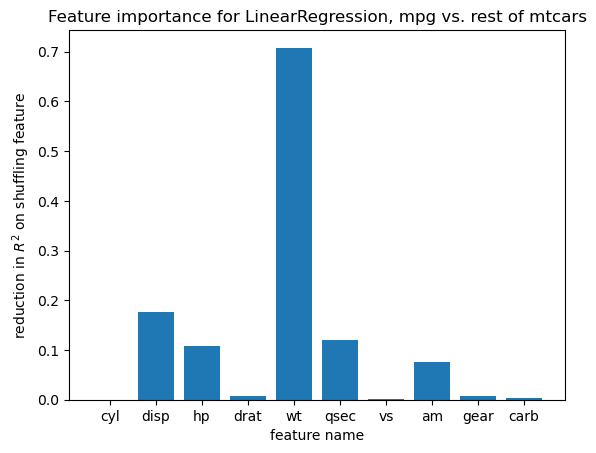

In [56]:
model = linear_model.LinearRegression()
model.fit(X, y)
pi = permutation_importance(estimator=model, X=X, y=y, random_state=0)
print(f'pi.importances_mean={pi.importances_mean}')
print(f'pi.importances_std={pi.importances_std}')
print(f'pi.importances={pi.importances}')
plt.bar(x=range(X.columns.size), height=pi.importances_mean, tick_label=X.columns)
plt.title('Feature importance for LinearRegression, mpg vs. rest of mtcars')
plt.xlabel('feature name')
_ = plt.ylabel(r'reduction in $R^2$ on shuffling feature')


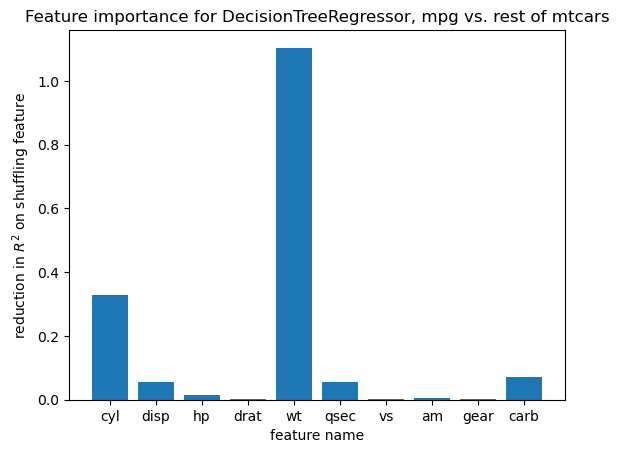

In [58]:
model = DecisionTreeRegressor()
model.fit(X, y)
pi = permutation_importance(estimator=model, X=X, y=y, random_state=0)
plt.bar(x=range(X.columns.size), height=pi.importances_mean, tick_label=X.columns)
plt.title('Feature importance for DecisionTreeRegressor, mpg vs. rest of mtcars')
plt.xlabel('feature name')
_ = plt.ylabel(r'reduction in $R^2$ on shuffling feature')


It would be better to find importance on validation data: coming soon.
